In [1]:
import statistics as st
import numpy as np
import pandas as pd
from scipy.stats import variation
import matplotlib.pylab as plt
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn import metrics
from sklearn.metrics import roc_curve, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sn
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample

In [9]:
df_data = pd.read_csv('ticdata2000.txt',sep='\t', header=None)
df_eval = pd.read_csv('ticeval2000.txt',sep='\t')
df_tgts = pd.read_csv('tictgts2000.txt',sep='\t')


In [10]:
df_data.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
            85],
           dtype='int64')

In [36]:
#X = ['0', '1', '2', '3',  '4',  '5',  '6',  '7',  '8',  '9', '10', '11', '12', '13', '14', '15', '16', '17',
#            '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
#            '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51',
#            '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68',
#            '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84']
#y = ['85']
X = [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84]


y = 85

In [37]:
df_data[85].value_counts()

0    5474
1     348
Name: 85, dtype: int64

In [38]:

# Separate majority and minority classes
df_majority = df_data[df_data[85]==0]
df_minority = df_data[df_data[85]==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=2736,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled[85].value_counts()

0    5474
1    2736
Name: 85, dtype: int64

In [39]:
clf = MultinomialNB()
clf.fit(df_data[X], df_data[y])

fitted = clf.predict(df_eval)

In [40]:
scores = cross_val_score(clf, df_data[X], df_data[y], cv=5)
scores

array([0.73733906, 0.75450644, 0.78350515, 0.75      , 0.76030928])

In [41]:
scores.mean()

0.7571319853103844

Recall =  0.6064703201142195
Precision =  0.5318421954738299
AUC =  0.670498191299918


C:\Users\phrc_\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


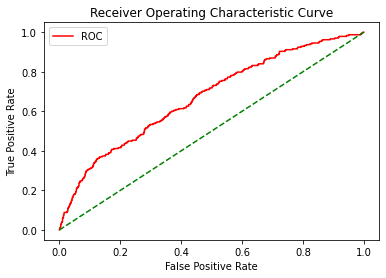

In [42]:
prob = clf.predict_proba(df_eval)
prob = prob[:, 1]
print('Recall = ', recall_score(df_tgts, fitted, average='macro'))

print('Precision = ' ,precision_score(df_tgts, fitted, average='macro'))

fpr, tpr, thresholds = metrics.roc_curve(df_tgts, fitted, pos_label=2)
print('AUC = ', metrics.roc_auc_score(df_tgts, prob))


def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()



fper, tper, thresholds = roc_curve(df_tgts, prob)
plot_roc_curve(fper, tper)

In [43]:
logit_reg = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
logit_reg.fit(df_data[X], df_data[y])

LogisticRegression(C=1e+42, solver='liblinear')

In [44]:
#fit = logit_reg.predict(df_eval)

In [50]:
pred = logit_reg.predict(df_eval)
pred_y = logit_reg.predict(df_eval) == 'default'
true_y = df_tgts == 'default'
true_pos = true_y & pred_y
true_neg = ~true_y & ~pred_y
false_pos = ~true_y & pred_y
false_neg = true_y & ~pred_y

conf_mat = pd.DataFrame([[np.sum(true_pos), np.sum(false_neg)], [np.sum(false_pos), np.sum(true_neg)]])
conf_mat

C:\Users\phrc_\AppData\Local\Temp/ipykernel_14856/375001613.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  pred_y = logit_reg.predict(df_eval) == 'default'


,0,1
0,0 0 dtype: int64,0 0 dtype: int64
1,0 0 dtype: int64,0 3999 dtype: int64


In [51]:
print(confusion_matrix(df_tgts, logit_reg.predict(df_eval)))

[[3755    6]
 [ 235    3]]


In [52]:
conf_mat = confusion_matrix(df_tgts, logit_reg.predict(df_eval))
print('Precision', conf_mat[0, 0] / sum(conf_mat[:, 0]))
print('Recall', conf_mat[0, 0] / sum(conf_mat[0, :]))
print('Specificity', conf_mat[1, 1] / sum(conf_mat[1, :]))

Precision 0.9411027568922306
Recall 0.9984046796064876
Specificity 0.012605042016806723
